In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(f'No of rows/training examples: {df.shape[0]}, No of columns/features: {df.shape[1]}')
df.sample(5)

No of rows/training examples: 7043, No of columns/features: 21


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4248,1020-JPQOW,Female,0,Yes,No,56,Yes,Yes,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,No,Electronic check,90.55,5116.6,No
5657,3096-GKWEB,Male,0,Yes,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.75,1691.9,No
6719,2509-TFPJU,Male,0,Yes,No,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.75,1864.2,No
5665,6345-HOVES,Male,0,No,No,34,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),25.05,852.7,No
4424,4729-XKASR,Male,0,No,Yes,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,24.75,24.75,Yes


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Text(0.5, 1.0, 'Effect of Gender on customer churn')

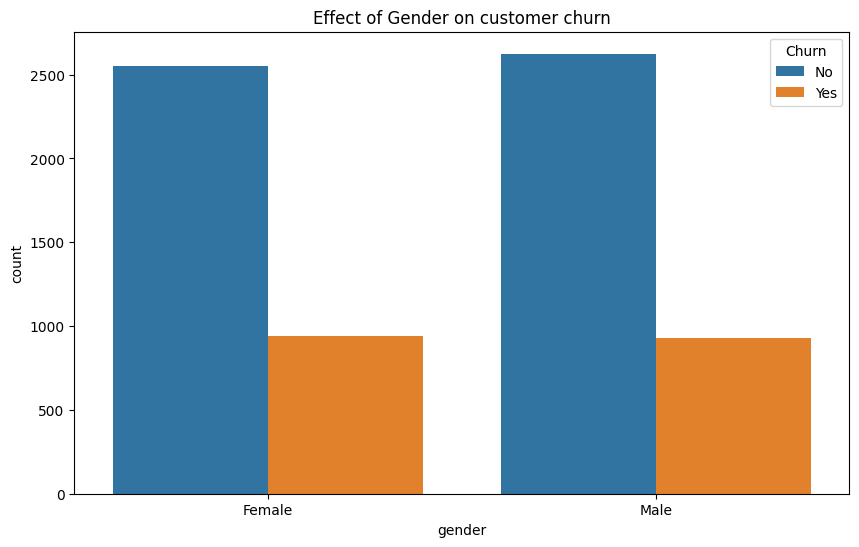

In [7]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x= 'gender', hue='Churn', data=df)
ax.set_title(f'Effect of Gender on customer churn')

Text(0.5, 0, 'SeniorCitizens(0: No, 1: Yes)')

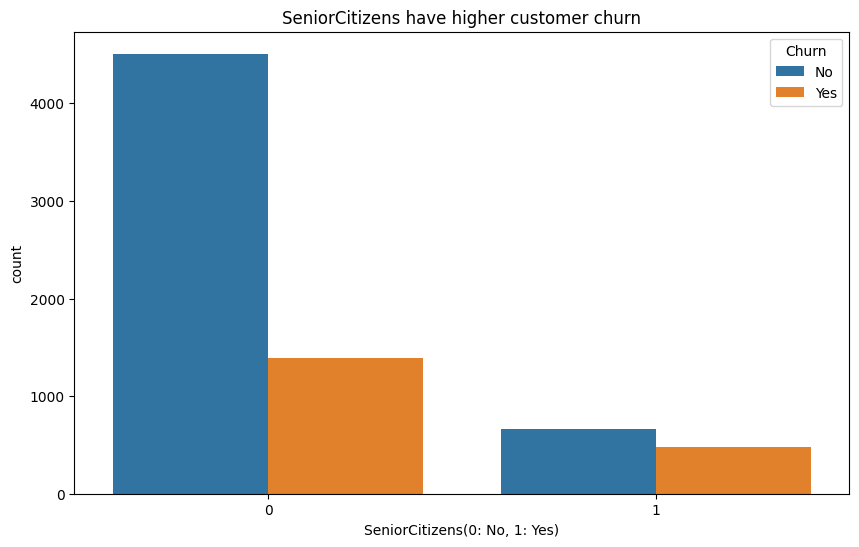

In [8]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x= 'SeniorCitizen', hue='Churn', data=df)
ax.set_title(f'SeniorCitizens have higher customer churn')
plt.xlabel('SeniorCitizens(0: No, 1: Yes)')

Text(0.5, 1.0, 'Effect of internet service on customer churn')

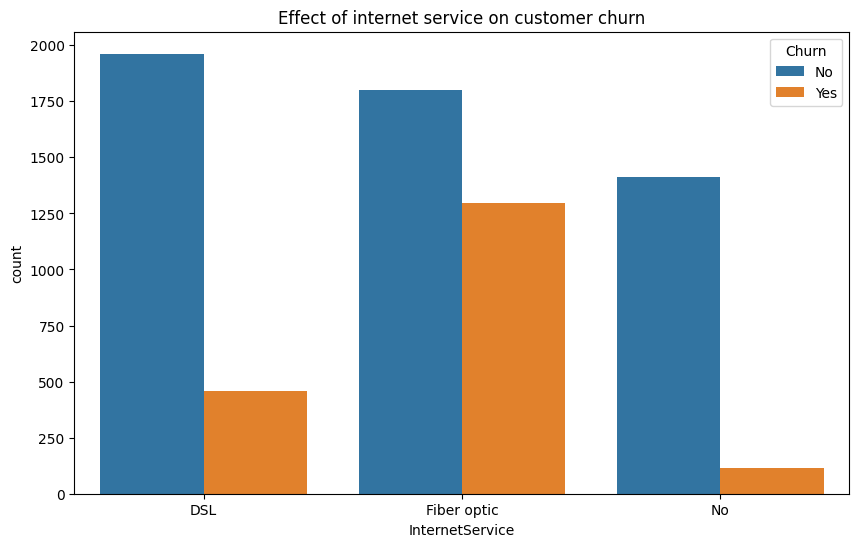

In [9]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x= 'InternetService', hue='Churn', data=df)
ax.set_title(f'Effect of internet service on customer churn')

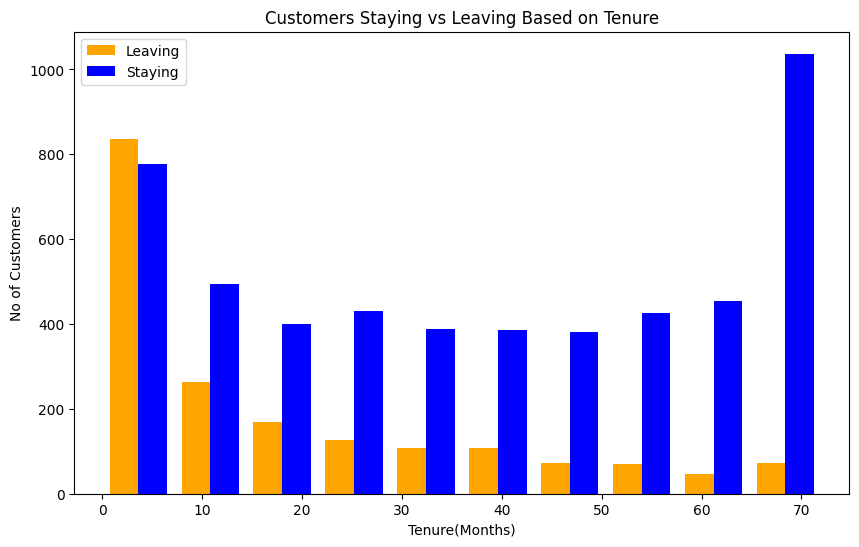

In [10]:
tenure_churn_yes = df[df.Churn == 'Yes'].tenure
tenure_churn_no = df[df.Churn == 'No'].tenure

plt.figure(figsize=(10,6))
plt.hist([tenure_churn_yes, tenure_churn_no], color=['orange', 'blue'], label= ['Leaving', 'Staying'])
plt.xlabel('Tenure(Months)')
plt.ylabel('No of Customers')
plt.title('Customers Staying vs Leaving Based on Tenure')
plt.legend()

In [11]:
df1 = df.drop('customerID', axis = 'columns')
df1.shape # Print the shape of new dataframe

(7043, 20)

In [12]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
df1.TotalCharges.unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [14]:
df1[df1.TotalCharges == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
df1.TotalCharges =  df1.TotalCharges.replace(r' ', '0')
df1[df1.tenure == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,No


In [16]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
print(f'New datatype of TotalCharges : { df1.TotalCharges.dtype}')

New datatype of TotalCharges : float64


In [17]:
def print_unique_col_values(df):
    """Print unique values from categorical columns of the given dataframe"""
    print('Unique values from categorical columns,\n')
    for column in df.columns:
        if(df[column].dtypes == 'object'): 
            print(f'column: {column}, Unique vlaues: {df[column].unique()}')
        
print_unique_col_values(df1)

Unique values from categorical columns,

column: gender, Unique vlaues: ['Female' 'Male']
column: Partner, Unique vlaues: ['Yes' 'No']
column: Dependents, Unique vlaues: ['No' 'Yes']
column: PhoneService, Unique vlaues: ['No' 'Yes']
column: MultipleLines, Unique vlaues: ['No phone service' 'No' 'Yes']
column: InternetService, Unique vlaues: ['DSL' 'Fiber optic' 'No']
column: OnlineSecurity, Unique vlaues: ['No' 'Yes' 'No internet service']
column: OnlineBackup, Unique vlaues: ['Yes' 'No' 'No internet service']
column: DeviceProtection, Unique vlaues: ['No' 'Yes' 'No internet service']
column: TechSupport, Unique vlaues: ['No' 'Yes' 'No internet service']
column: StreamingTV, Unique vlaues: ['No' 'Yes' 'No internet service']
column: StreamingMovies, Unique vlaues: ['No' 'Yes' 'No internet service']
column: Contract, Unique vlaues: ['Month-to-month' 'One year' 'Two year']
column: PaperlessBilling, Unique vlaues: ['Yes' 'No']
column: PaymentMethod, Unique vlaues: ['Electronic check' 'Mail

In [18]:
df1.replace('No internet service', 'No', inplace = True)
df1.replace('No phone service', 'No', inplace = True)
# Lets print unique values again
print_unique_col_values(df1)

Unique values from categorical columns,

column: gender, Unique vlaues: ['Female' 'Male']
column: Partner, Unique vlaues: ['Yes' 'No']
column: Dependents, Unique vlaues: ['No' 'Yes']
column: PhoneService, Unique vlaues: ['No' 'Yes']
column: MultipleLines, Unique vlaues: ['No' 'Yes']
column: InternetService, Unique vlaues: ['DSL' 'Fiber optic' 'No']
column: OnlineSecurity, Unique vlaues: ['No' 'Yes']
column: OnlineBackup, Unique vlaues: ['Yes' 'No']
column: DeviceProtection, Unique vlaues: ['No' 'Yes']
column: TechSupport, Unique vlaues: ['No' 'Yes']
column: StreamingTV, Unique vlaues: ['No' 'Yes']
column: StreamingMovies, Unique vlaues: ['No' 'Yes']
column: Contract, Unique vlaues: ['Month-to-month' 'One year' 'Two year']
column: PaperlessBilling, Unique vlaues: ['Yes' 'No']
column: PaymentMethod, Unique vlaues: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
column: Churn, Unique vlaues: ['No' 'Yes']


In [19]:
df1['Churn'].replace({'Yes': 1,'No': 0},inplace=True)

In [20]:
df2 = pd.get_dummies(data = df1)

print(f'So we have added {df2.shape[1]- df1.shape[1]} more columns to our list. New shape : {df2.shape}')
df2.sample(5)

So we have added 19 more columns to our list. New shape : (7043, 39)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
360,0,5,20.20,83.75,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1
5707,0,2,45.55,84.40,0,1,0,1,0,1,...,0,1,0,0,1,0,0,0,1,0
625,0,25,95.15,2395.70,0,1,0,0,1,1,...,1,1,0,0,0,1,0,0,1,0
2886,0,60,104.95,6236.75,0,1,0,1,0,1,...,1,1,0,0,0,1,1,0,0,0
6321,0,30,19.65,655.85,1,1,0,0,1,1,...,0,1,0,0,1,0,1,0,0,0


In [21]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale]) # Fit to data, then transform it
df2[cols_to_scale].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,0.449599,0.462803,0.262497
std,0.341104,0.299403,0.261007
min,0.000000,0.000000,0.000000
25%,0.125000,0.171642,0.045891
50%,0.402778,0.518408,0.160574
75%,0.763889,0.712438,0.436003
max,1.000000,1.000000,1.000000


In [22]:
X = df2.drop('Churn',axis = 'columns')
# Create label vector y
y = df2['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)
print(f'X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'X_test: {X_test.shape}, y_test: {y_test.shape}')

# Lets have a look at our training datatset
X_train.sample(5)

X_train: (5634, 38), y_train: (5634,)
X_test: (1409, 38), y_test: (1409,)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3192,0,0.805556,0.008955,0.119231,0,1,1,0,1,0,...,0,0,0,1,0,1,1,0,0,0
3768,0,0.763889,0.592040,0.491249,1,0,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0
1305,0,0.388889,0.410945,0.189578,1,0,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0
3343,0,0.222222,0.018408,0.036685,1,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
5036,1,0.222222,0.667662,0.158340,1,0,0,1,1,0,...,1,1,0,0,0,1,0,1,0,0


In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(38, input_shape= (38,), activation= 'relu'),
    tf.keras.layers.Dense(14, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')     
])

model.compile(optimizer= 'adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [24]:
model.fit(X_train, y_train, epochs= 100)

Epoch 1/100
177/177 [==============================] - 7s 4ms/step - loss: 0.4897 - accuracy: 0.7492
Epoch 2/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4308 - accuracy: 0.7902
Epoch 3/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4245 - accuracy: 0.7941
Epoch 4/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4209 - accuracy: 0.7966
Epoch 5/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4190 - accuracy: 0.7991
Epoch 6/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4173 - accuracy: 0.7973
Epoch 7/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4147 - accuracy: 0.8005
Epoch 8/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4135 - accuracy: 0.8030
Epoch 9/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4120 - accuracy: 0.8030
Epoch 10/100
177/177 [==============================] - 1s 3ms/step - loss: 0.4113 - accura

In [25]:
model.evaluate(X_test, y_test)


45/45 [==============================] - 0s 4ms/step - loss: 0.4684 - accuracy: 0.7715


[0.46843352913856506, 0.7714691162109375]

In [26]:
predictions = model.predict(X_test)
predictions[:5]

45/45 [==============================] - 0s 3ms/step


array([[0.7204164 ],
       [0.05792217],
       [0.0024057 ],
       [0.7041431 ],
       [0.02648881]], dtype=float32)

In [27]:
y_pred = []

for val in predictions:
    if val > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
            
y_pred[:10]

[1, 0, 0, 1, 0, 0, 0, 0, 0, 0]

In [28]:
df_true_pred = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred}) 
df_true_pred[:10]

,y_test,y_pred
185,1,1
2715,0,0
3825,0,0
1807,1,1
132,0,0
1263,1,0
3732,0,0
1672,0,0
811,1,0
2526,1,0


In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85      1036
           1       0.57      0.55      0.56       373

    accuracy                           0.77      1409
   macro avg       0.71      0.70      0.70      1409
weighted avg       0.77      0.77      0.77      1409



Text(95.72222222222221, 0.5, 'Truth')

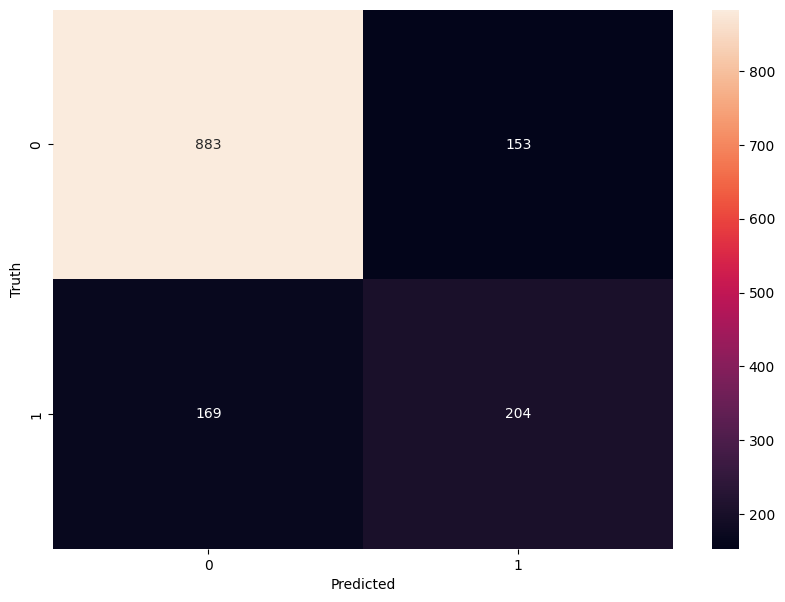

In [30]:
cm = tf.math. confusion_matrix(labels= y_test, predictions= y_pred)
plt.figure(figsize = (10, 7))
sns.heatmap(cm, annot= True, fmt= 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')